In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
wildlife = pd.read_csv('../clean_data/data_syth.csv', parse_dates=['CALL_SAVED_TIME'])

In [3]:
wildlife.shape

(152743, 6)

In [4]:
wildlife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152743 entries, 0 to 152742
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   X1               152743 non-null  int64         
 1   CALL_REGION      152743 non-null  object        
 2   CALL_SAVED_TIME  152672 non-null  datetime64[ns]
 3   reason_for_call  152743 non-null  object        
 4   type_of_calls    152743 non-null  object        
 5   CA_ANIMAL_TYPE   152743 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 7.0+ MB


In [5]:
wildlife.head()

,X1,CALL_REGION,CALL_SAVED_TIME,reason_for_call,type_of_calls,CA_ANIMAL_TYPE
0,0,Birmingham,2019-12-28,rescue,report_calls,Rat
1,1,Birmingham,2020-01-04,rescue,report_calls,Rat
2,2,Birmingham,2020-01-05,rescue,report_calls,Rat
3,3,Leeds,2020-01-04,injury,report_calls,Deer
4,4,Birmingham,2019-12-29,injury,report_calls,Wild Bird


In [6]:
wildlife_injuries = wildlife[wildlife['reason_for_call']=='injury'].copy()
wildlife_injuries.info()
#Client is mostly interested in injuries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83661 entries, 3 to 152742
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   X1               83661 non-null  int64         
 1   CALL_REGION      83661 non-null  object        
 2   CALL_SAVED_TIME  83633 non-null  datetime64[ns]
 3   reason_for_call  83661 non-null  object        
 4   type_of_calls    83661 non-null  object        
 5   CA_ANIMAL_TYPE   83661 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.5+ MB


## Trend by region

In [7]:
df_count = wildlife_injuries.groupby('CALL_REGION').count().sort_values(['reason_for_call'], ascending = False)[['reason_for_call']]

In [8]:
df_count['Region'] = df_count.index

In [9]:
df_count
#there are more injuries in Manchester reported, due to more population?

,reason_for_call,Region
CALL_REGION,,
Manchester,22056,Manchester
Birmingham,18826,Birmingham
Leeds,15993,Leeds
Sheffield,14996,Sheffield
Unknown,6117,Unknown
Liverpool,5673,Liverpool


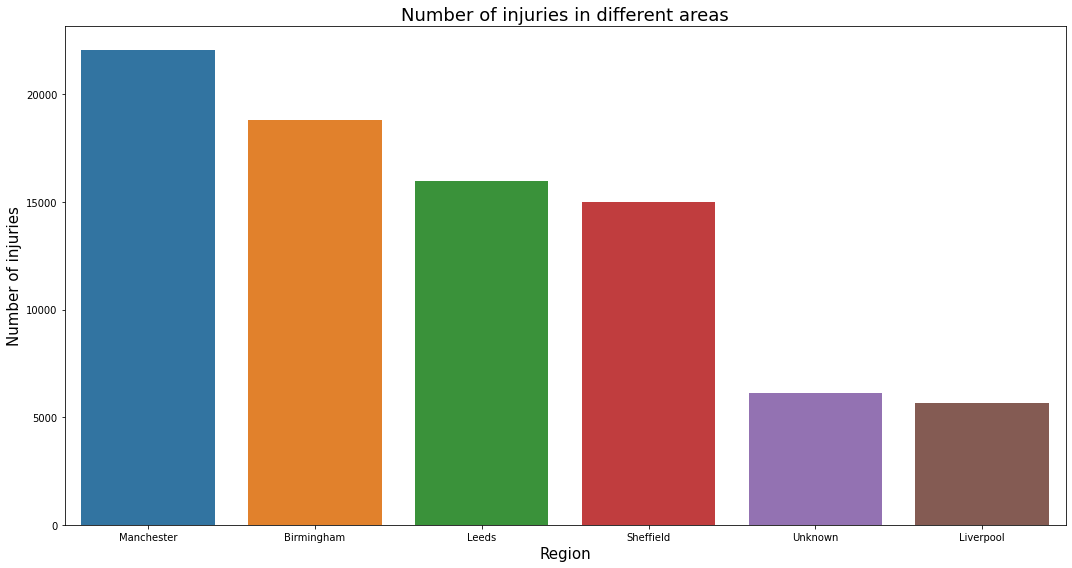

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Region',y = 'reason_for_call', data = df_count)
plt.xlabel("Region", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries in different areas", size=18)
plt.tight_layout()

## Trend by year

In [11]:
df_time = wildlife_injuries.groupby(['CALL_SAVED_TIME']).count()
df_time

,X1,CALL_REGION,reason_for_call,type_of_calls,CA_ANIMAL_TYPE
CALL_SAVED_TIME,,,,,
2017-12-31,6,6,6,6,6
2018-01-01,43,43,43,43,43
2018-01-02,44,44,44,44,44
2018-01-03,58,58,58,58,58
2018-01-04,43,43,43,43,43
...,...,...,...,...,...
2020-05-01,45,45,45,45,45
2020-05-02,33,33,33,33,33
2020-05-03,30,30,30,30,30


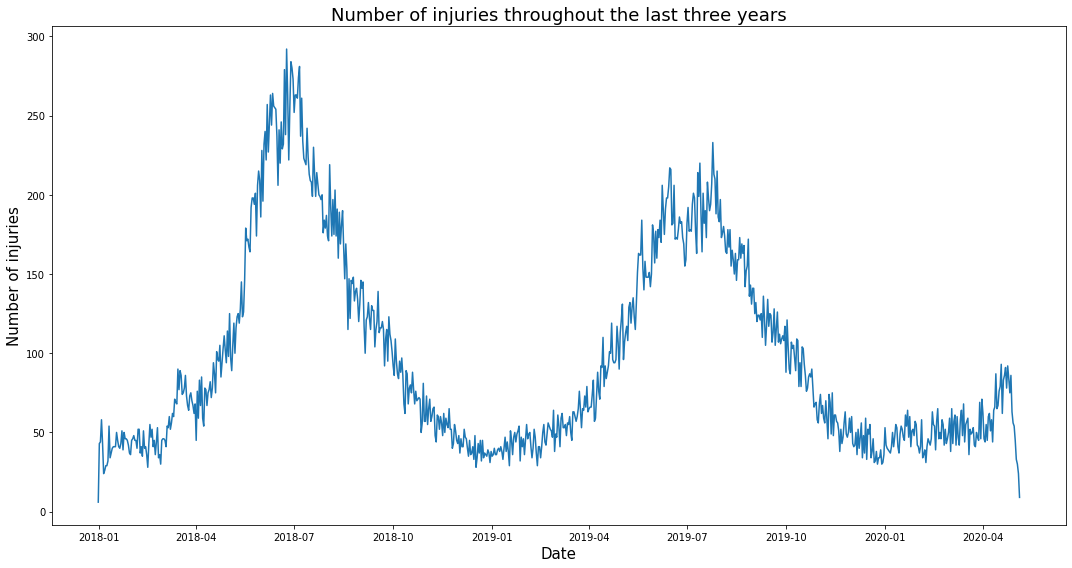

In [12]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = df_time)
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries throughout the last three years", size=18)
plt.tight_layout()

Looks like there is a trend of increase in injuries at summer time. Possibly because people walk more often and report injuries? Or just in general more injuries happen?

(736695.0, 736846.0)

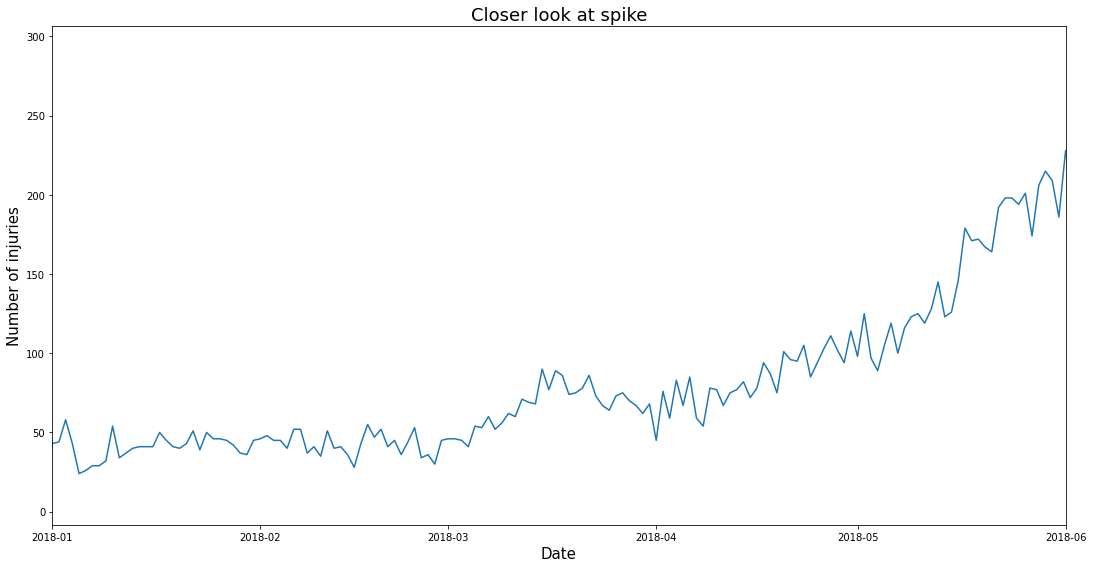

In [13]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = df_time)
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Closer look at spike", size=18)
plt.tight_layout()
plt.xlim([datetime.date(2018, 1,1), datetime.date(2018, 6,1)])

Quite a big spikes of report at around spring time in 2018.

## By year and region

In [14]:
injuries=wildlife.query("reason_for_call =='injury'")
weekly_injuries_by_region=injuries.groupby([pd.Grouper(key='CALL_SAVED_TIME',freq='W'),'CALL_REGION']).count()
weekly_injuries_by_region

X1  reason_for_call  type_of_calls  \
CALL_SAVED_TIME CALL_REGION                                       
2017-12-31      Birmingham    1                1              1   
                Leeds         1                1              1   
                Liverpool     1                1              1   
                Manchester    3                3              3   
2018-01-07      Birmingham   53               53             53   
...                          ..              ...            ...   
2020-05-10      Leeds         6                6              6   
                Liverpool     1                1              1   
                Manchester    5                5              5   
                Sheffield     4                4              4   
                Unknown       4                4              4   

                             CA_ANIMAL_TYPE  
CALL_SAVED_TIME CALL_REGION                  
2017-12-31      Birmingham                1  
                Leeds                     1  
                Liverpool                 1  
                Manchester                3  
2018-01-07      Birmingham               53  
...                                     ...  
2020-05-10      Leeds                     6  
                Liverpool                 1  
                Manchester                5  
                Sheffield                 4  
                Unknown                   4  

[742 rows x 4 columns]

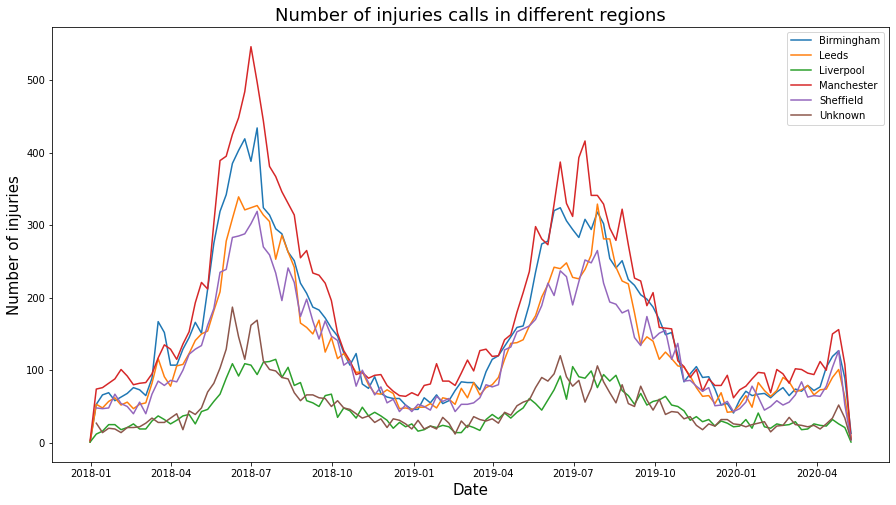

In [15]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="reason_for_call", hue='CALL_REGION',data=weekly_injuries_by_region)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries calls in different regions", size=18);

All regions have increase in summer time. 

Text(0.5, 1.0, 'Number of injuries calls in Leeds')

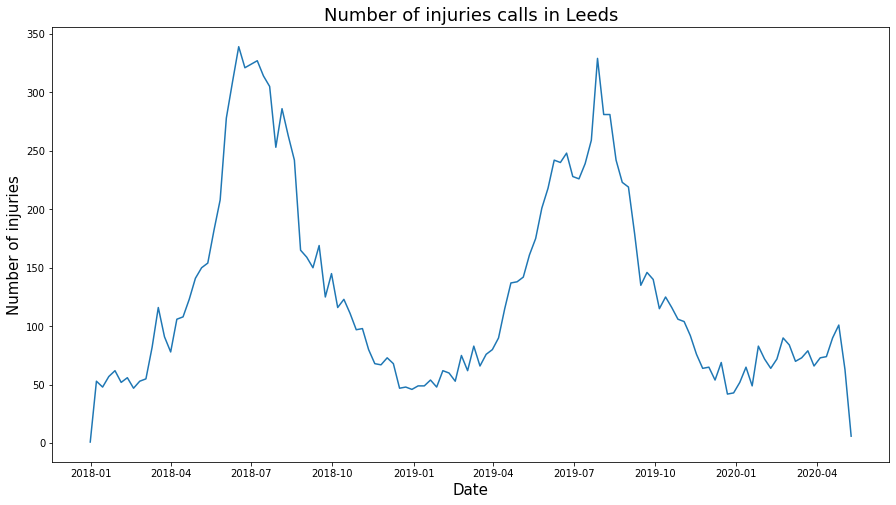

In [16]:
# any better for just one region?
leeds=weekly_injuries_by_region.query('CALL_REGION=="Leeds"')
plt.figure(figsize=(15,8))
sns.lineplot(data=leeds,x='CALL_SAVED_TIME',y='reason_for_call')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries calls in Leeds", size=18)

<Figure size 1080x576 with 0 Axes>

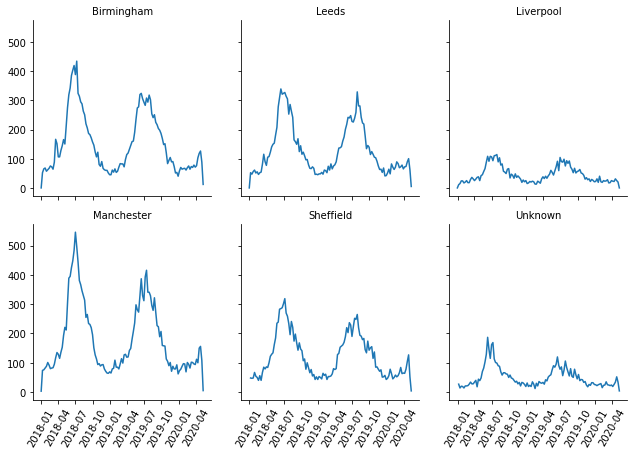

In [17]:
# should have been map_dataframe here, not map
plt.figure(figsize=(15,8))
separate=sns.FacetGrid(weekly_injuries_by_region.reset_index(), col='CALL_REGION', col_wrap=3)
separate.map_dataframe(sns.lineplot, x='CALL_SAVED_TIME', y='reason_for_call')
# this gets rid of CALL_REGION =
separate.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in separate.axes.flat];

It looks like all regions have decreasing trend in injuries reports.

# Trend by types of animals

In [18]:
df_type_region = wildlife_injuries.groupby(['CALL_REGION','CA_ANIMAL_TYPE']).count()
df_type_region

X1  CALL_SAVED_TIME  reason_for_call  \
CALL_REGION CA_ANIMAL_TYPE                                             
Birmingham  *Other Wildlife      6                6                6   
            Badger              36               36               36   
            Bat                  9                9                9   
            Deer             11573            11570            11573   
            Duck                69               69               69   
...                            ...              ...              ...   
Unknown     Turtle               1                1                1   
            Weasel               1                1                1   
            Wild Bird          159              159              159   
            Wild Mouse          65               65               65   
            Wild Rabbit        339              339              339   

                             type_of_calls  
CALL_REGION CA_ANIMAL_TYPE                  
Birmingham  *Other Wildlife              6  
            Badger                      36  
            Bat                          9  
            Deer                     11573  
            Duck                        69  
...                                    ...  
Unknown     Turtle                       1  
            Weasel                       1  
            Wild Bird                  159  
            Wild Mouse                  65  
            Wild Rabbit                339  

[143 rows x 4 columns]

In [19]:
df_type_region.reset_index(inplace = True)

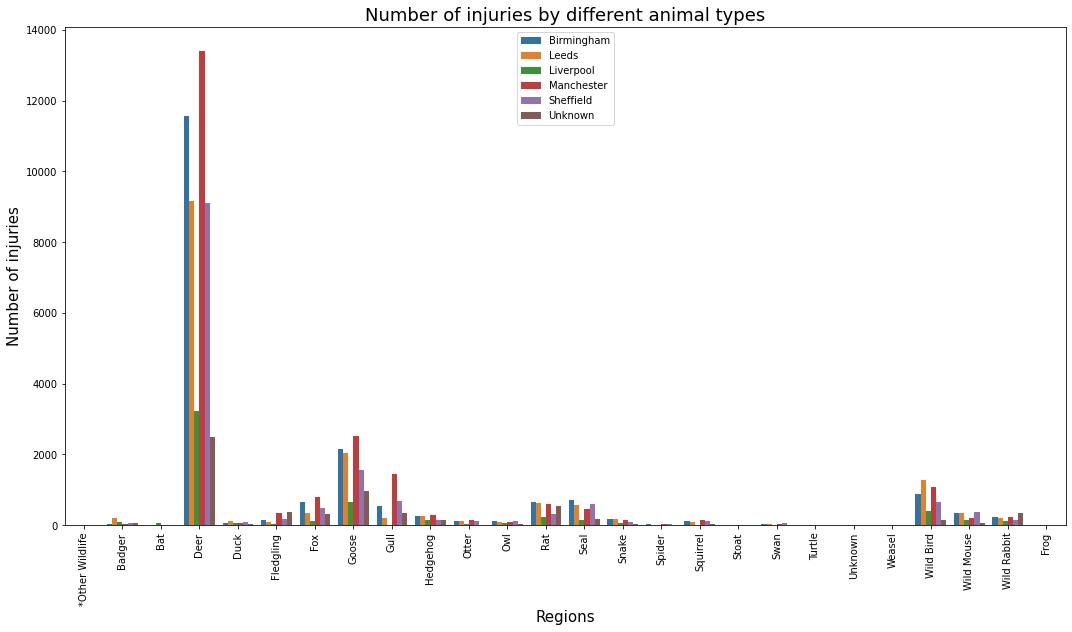

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(x="CA_ANIMAL_TYPE", hue = 'CALL_REGION', y="reason_for_call", data=df_type_region)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.legend(loc='best')

In [21]:
deer_region = df_type_region[df_type_region['CA_ANIMAL_TYPE']== 'Deer']
deer_region = deer_region.sort_values('reason_for_call', ascending=False)
#created a new table as there are lots of deer in each region

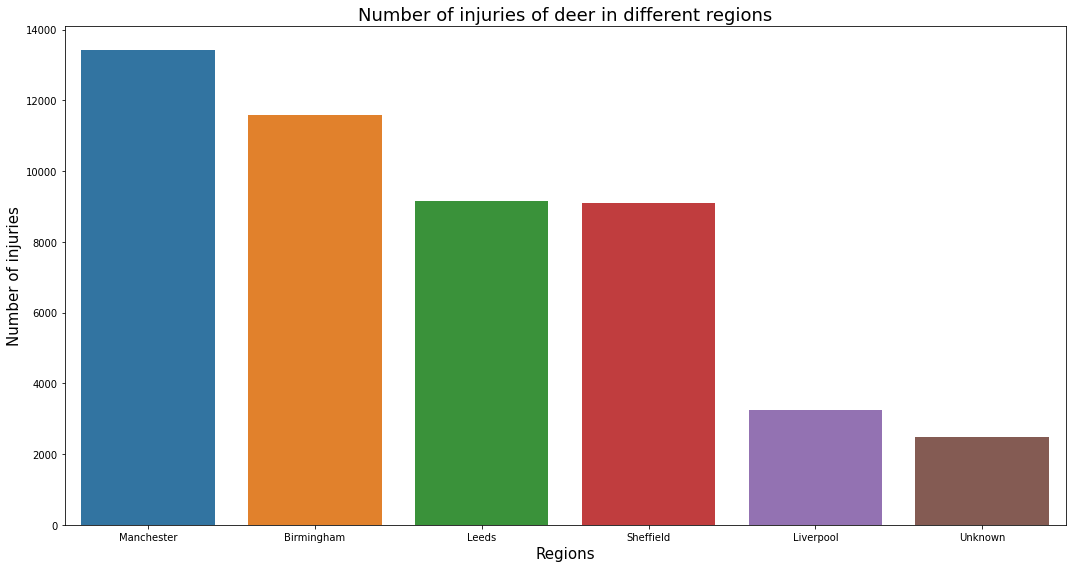

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(x="CALL_REGION", y="reason_for_call", data=deer_region)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries of deer in different regions", size=18)
plt.tight_layout()

In [23]:
all_types_region = df_type_region[df_type_region['CA_ANIMAL_TYPE']!= 'Deer']
#table without wild bird

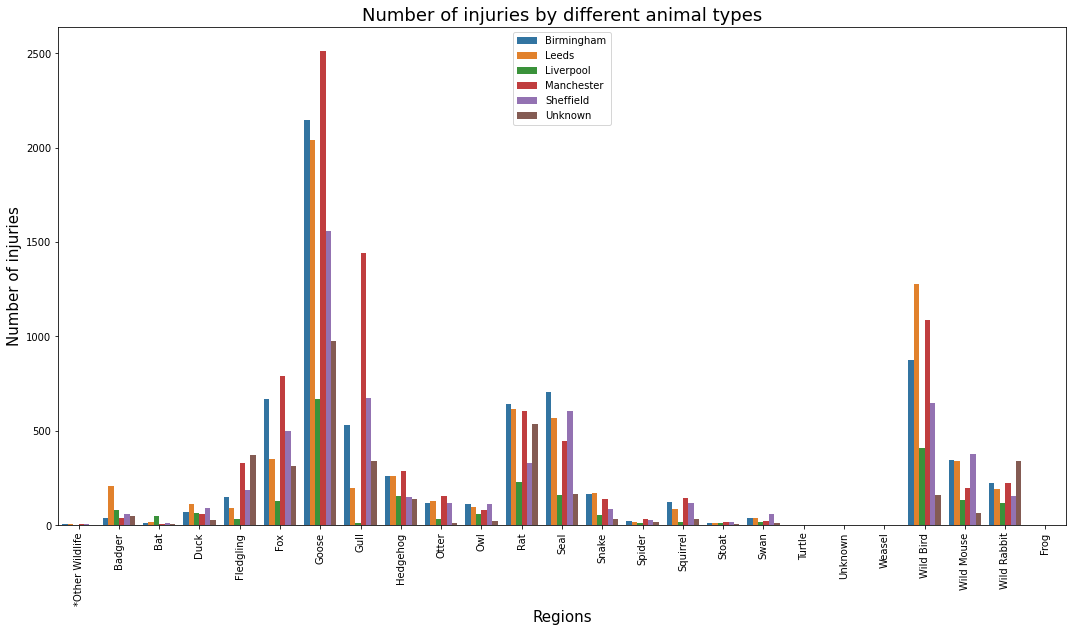

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(x="CA_ANIMAL_TYPE", hue = 'CALL_REGION', y="reason_for_call", data=all_types_region)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.legend(loc='best')

In [25]:
all_types_region.sort_values('reason_for_call',ascending = False).groupby('CALL_REGION').head(5).sort_values(['CALL_REGION','reason_for_call'])
#top 5 animals in each region by number of calls

,CALL_REGION,CA_ANIMAL_TYPE,X1,CALL_SAVED_TIME,reason_for_call,type_of_calls
12,Birmingham,Rat,643,643,643,643
6,Birmingham,Fox,669,669,669,669
13,Birmingham,Seal,703,703,703,703
22,Birmingham,Wild Bird,874,874,874,874
7,Birmingham,Goose,2147,2146,2147,2147
31,Leeds,Fox,353,353,353,353
39,Leeds,Seal,569,567,569,569
38,Leeds,Rat,615,615,615,615
45,Leeds,Wild Bird,1277,1277,1277,1277
33,Leeds,Goose,2042,2041,2042,2042


Top 5 animals in each region were assigned to a new column and the rest animals to 'other'. This was done to concentrate on the top 5 animals reported for injuries in each region.

In [26]:
conditions = [
    (all_types_region['CA_ANIMAL_TYPE']=='Fledgling'), (all_types_region['CA_ANIMAL_TYPE']=='Fox'),
    (all_types_region['CA_ANIMAL_TYPE']=='Gull'),(all_types_region['CA_ANIMAL_TYPE']=='Swan'),
    (all_types_region['CA_ANIMAL_TYPE']=='Hedgehog'), (all_types_region['CA_ANIMAL_TYPE']=='Wild Bird'),
    (all_types_region['CA_ANIMAL_TYPE']=='Duck'),(all_types_region['CA_ANIMAL_TYPE']=='Badger'),
    (all_types_region['CA_ANIMAL_TYPE']=='Bat'),(all_types_region['CA_ANIMAL_TYPE']=='*Other Wildlife'),
    (all_types_region['CA_ANIMAL_TYPE']=='Frog'),(all_types_region['CA_ANIMAL_TYPE']=='Goose'),
    (all_types_region['CA_ANIMAL_TYPE']=='Nestling'),(all_types_region['CA_ANIMAL_TYPE']=='Otter'),
    (all_types_region['CA_ANIMAL_TYPE']=='Owl'),(all_types_region['CA_ANIMAL_TYPE']=='Seal'),
    (all_types_region['CA_ANIMAL_TYPE']=='Squirrel'),(all_types_region['CA_ANIMAL_TYPE']=='Weasel'),
    (all_types_region['CA_ANIMAL_TYPE']=='Turtle'),(all_types_region['CA_ANIMAL_TYPE']=='Rat'),
    (all_types_region['CA_ANIMAL_TYPE']=='Wild Mouse'),(all_types_region['CA_ANIMAL_TYPE']=='Wild Rabbit'),
    (all_types_region['CA_ANIMAL_TYPE']=='Fish'),(all_types_region['CA_ANIMAL_TYPE']=='Rabbit'),
    (all_types_region['CA_ANIMAL_TYPE']=='Snake'),(all_types_region['CA_ANIMAL_TYPE']=='Stoat'),
    (all_types_region['CA_ANIMAL_TYPE']=='Spider'),(all_types_region['CA_ANIMAL_TYPE']=='Unknown')
]
choices = ['Other', 'Fox','Gull','Other','Hedgehog','Wild Bird','Other','Other','Other','Other','Other','Goose','Other',
          'Other','Other','Seal','Other','Other','Other','Rat','Other','Other','Other','Other','Other','Other', 'Other', 'Other']

In [27]:
all_types_region['animal_type']=np.select(conditions,choices).copy()

<ipython-input-27-7b6921d577c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_types_region['animal_type']=np.select(conditions,choices).copy()


In [28]:
all_types_region['animal_type'].unique()

array(['Other', 'Fox', 'Goose', 'Gull', 'Hedgehog', 'Rat', 'Seal',
       'Wild Bird'], dtype=object)

In [29]:
all_types_region['CA_ANIMAL_TYPE'].unique()

array(['*Other Wildlife', 'Badger', 'Bat', 'Duck', 'Fledgling', 'Fox',
       'Goose', 'Gull', 'Hedgehog', 'Otter', 'Owl', 'Rat', 'Seal',
       'Snake', 'Spider', 'Squirrel', 'Stoat', 'Swan', 'Turtle',
       'Unknown', 'Weasel', 'Wild Bird', 'Wild Mouse', 'Wild Rabbit',
       'Frog'], dtype=object)

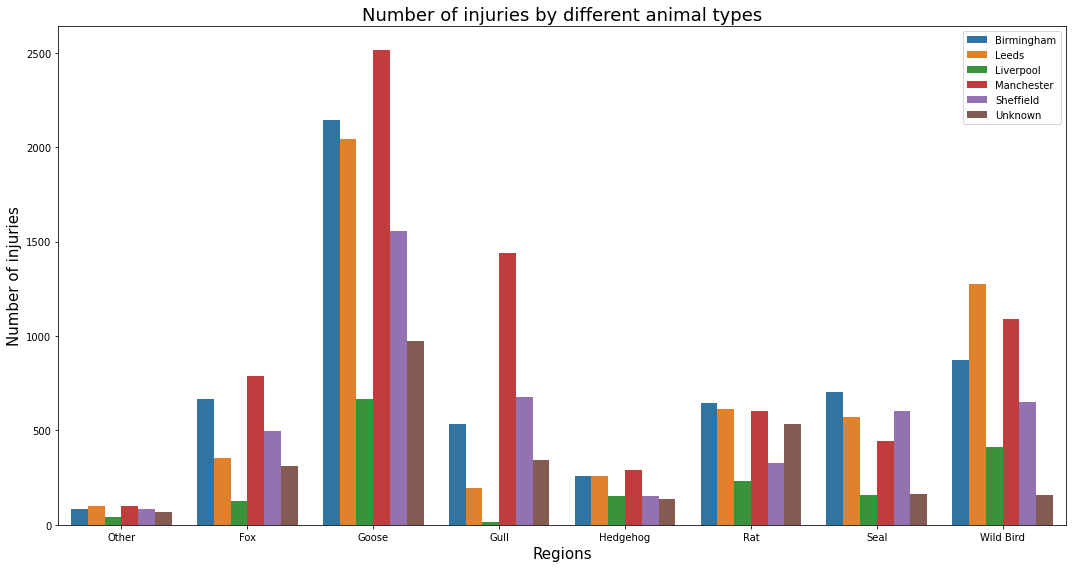

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(x="animal_type", hue = 'CALL_REGION', y="reason_for_call", data=all_types_region,ci = False)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18)
plt.tight_layout()
plt.legend(loc='best')

Goose has the highest after deer.

<Figure size 1080x576 with 0 Axes>

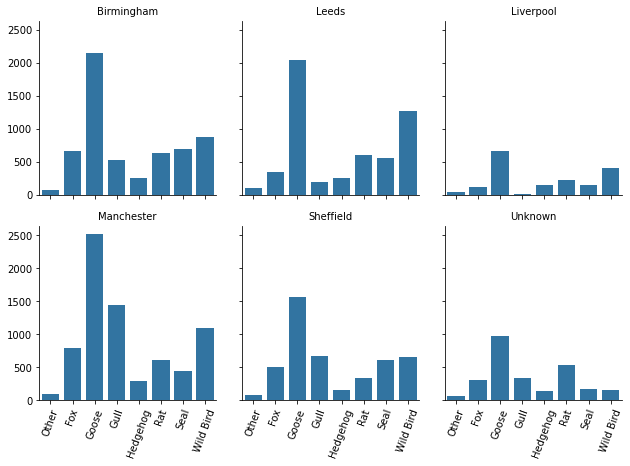

In [31]:
plt.figure(figsize=(15,8))
s_type=sns.FacetGrid(all_types_region, col='CALL_REGION', col_wrap=3)
s_type.map_dataframe(sns.barplot, x='animal_type', y='reason_for_call',ci = False)
s_type.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=70) for ax in s_type.axes.flat];

<Figure size 1080x576 with 0 Axes>

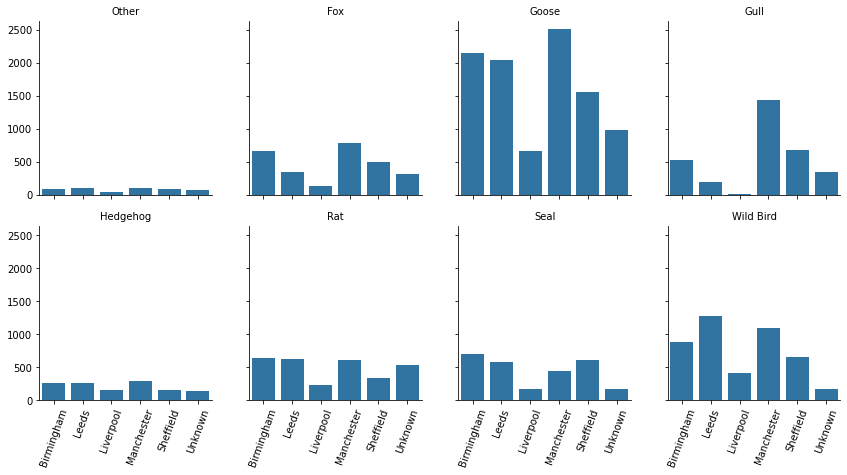

In [32]:
plt.figure(figsize=(15,8))
s_type=sns.FacetGrid(all_types_region, col='animal_type', col_wrap=4)
s_type.map_dataframe(sns.barplot, x='CALL_REGION', y='reason_for_call',ci = False)
s_type.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=70) for ax in s_type.axes.flat];

# Trend by types and year

In [33]:
weekly_injuries_by_types=injuries.groupby([pd.Grouper(key='CALL_SAVED_TIME',freq='W'),'CA_ANIMAL_TYPE']).count()
weekly_injuries_by_types

X1  CALL_REGION  reason_for_call  \
CALL_SAVED_TIME CA_ANIMAL_TYPE                                      
2017-12-31      Deer              6            6                6   
2018-01-07      Badger            3            3                3   
                Deer            166          166              166   
                Duck              5            5                5   
                Fledgling         2            2                2   
...                             ...          ...              ...   
2020-05-10      Hedgehog          1            1                1   
                Otter             1            1                1   
                Rat               1            1                1   
                Seal              2            2                2   
                Wild Bird         3            3                3   

                                type_of_calls  
CALL_SAVED_TIME CA_ANIMAL_TYPE                 
2017-12-31      Deer                        6  
2018-01-07      Badger                      3  
                Deer                      166  
                Duck                        5  
                Fledgling                   2  
...                                       ...  
2020-05-10      Hedgehog                    1  
                Otter                       1  
                Rat                         1  
                Seal                        2  
                Wild Bird                   3  

[2199 rows x 4 columns]

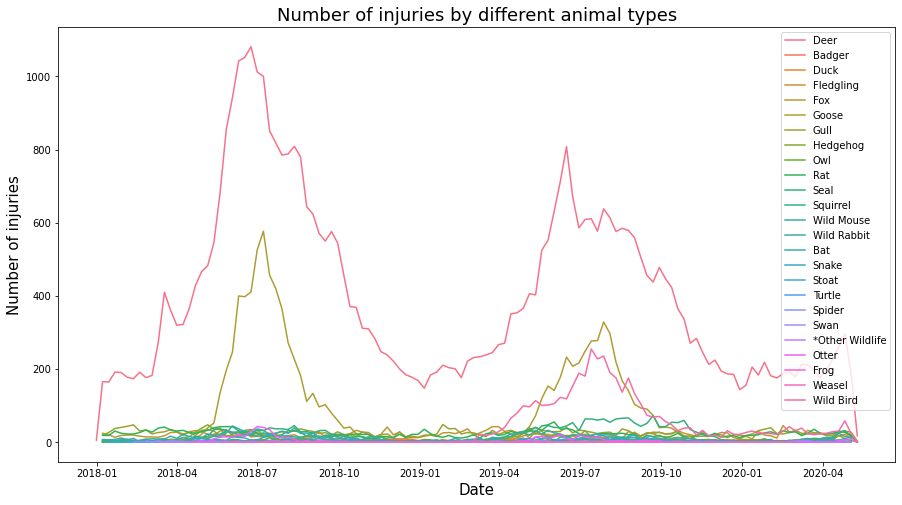

In [34]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="reason_for_call", hue='CA_ANIMAL_TYPE',data=weekly_injuries_by_types)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18);
# Wild Bird is the highest

In [35]:
weekly_injuries_by_types= weekly_injuries_by_types.reset_index().copy()
weekly_injuries_by_types

,CALL_SAVED_TIME,CA_ANIMAL_TYPE,X1,CALL_REGION,reason_for_call,type_of_calls
0,2017-12-31,Deer,6,6,6,6
1,2018-01-07,Badger,3,3,3,3
2,2018-01-07,Deer,166,166,166,166
3,2018-01-07,Duck,5,5,5,5
4,2018-01-07,Fledgling,2,2,2,2
...,...,...,...,...,...,...
2194,2020-05-10,Hedgehog,1,1,1,1
2195,2020-05-10,Otter,1,1,1,1
2196,2020-05-10,Rat,1,1,1,1
2197,2020-05-10,Seal,2,2,2,2


In [36]:
top5type_weekly = weekly_injuries_by_types.sort_values('reason_for_call', ascending = False).groupby('CALL_SAVED_TIME').head(5).sort_values(['CALL_SAVED_TIME','reason_for_call']).copy()

In [37]:
top5type_weekly = top5type_weekly.reset_index().copy()
top5type_weekly
#top 5 animals injured every week

,index,CALL_SAVED_TIME,CA_ANIMAL_TYPE,X1,CALL_REGION,reason_for_call,type_of_calls
0,0,2017-12-31,Deer,6,6,6,6
1,13,2018-01-07,Wild Mouse,8,8,8,8
2,10,2018-01-07,Rat,19,19,19,19
3,7,2018-01-07,Gull,20,20,20,20
4,5,2018-01-07,Fox,25,25,25,25
...,...,...,...,...,...,...,...
611,2197,2020-05-10,Seal,2,2,2,2
612,2193,2020-05-10,Gull,2,2,2,2
613,2198,2020-05-10,Wild Bird,3,3,3,3
614,2192,2020-05-10,Goose,4,4,4,4


In [38]:
top5type_weekly['CA_ANIMAL_TYPE'].unique()

array(['Deer', 'Wild Mouse', 'Rat', 'Gull', 'Fox', 'Wild Rabbit',
       'Hedgehog', 'Goose', 'Seal', 'Otter', 'Fledgling', 'Badger', 'Owl',
       'Wild Bird'], dtype=object)

Based on this top 5 animals in each region, I am going to create a new column with assigned types and other types.

In [39]:
conditions = [
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Fledgling'), (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Fox'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Gull'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Swan'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Hedgehog'), (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Deer'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Duck'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Badger'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Bat'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='*Other Wildlife'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Frog'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Goose'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Nestling'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Otter'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Owl'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Seal'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Squirrel'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Weasel'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Turtle'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Wild Mouse'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Wild Rabbit'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Fish'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Rabbit'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Snake'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Stoat'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Wild Bird'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Rat'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Unknown'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Spider')
]
choices = ['Fledgling', 'Fox','Gull','Other','Hedgehog','Deer','Other','Badger','Other','Other','Other','Goose','Other',
          'Otter','Owl','Seal','Other','Other','Other','Wild Mouse','Wild Rabbit','Other','Other','Other','Other',
          'Wild Bird', 'Rat', 'Other', 'Other']

In [40]:
weekly_injuries_by_types['animal_type']=np.select(conditions,choices).copy()

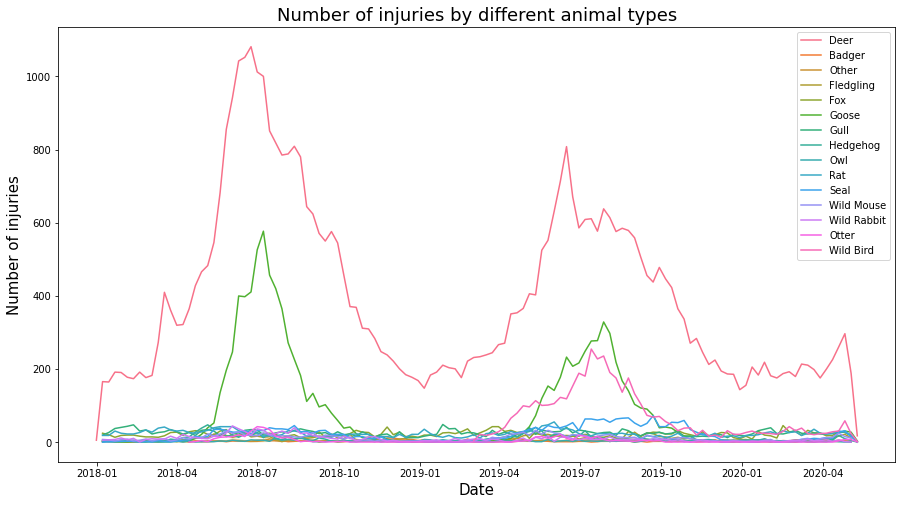

In [41]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="reason_for_call", hue='animal_type',data=weekly_injuries_by_types)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18);
#better but still cannot see small numbers - requires separation

In [42]:
weekly_high = weekly_injuries_by_types[weekly_injuries_by_types['animal_type'].isin(['Deer','Goose','Wild Bird'])]

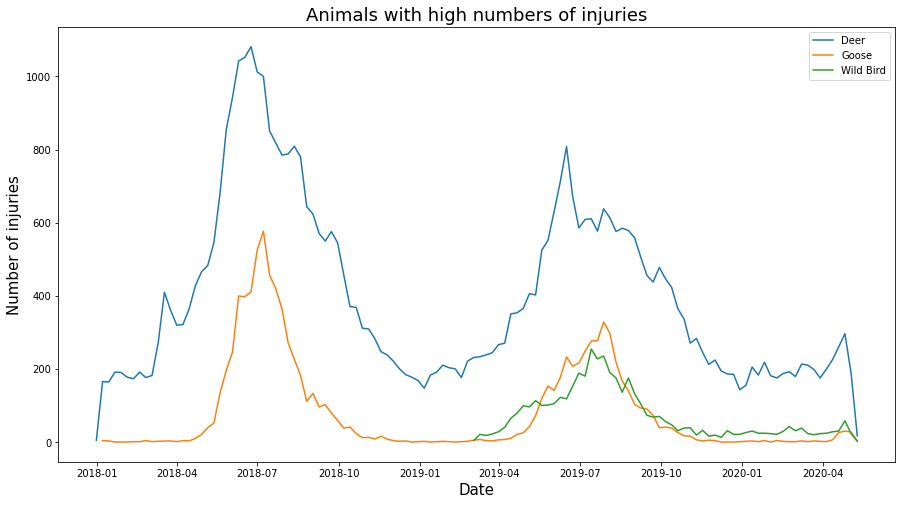

In [43]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="reason_for_call", hue='animal_type',data=weekly_high)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Animals with high numbers of injuries", size=18);

Deer and birds injuries relate to seasons.

In [44]:
weekly_low = weekly_injuries_by_types[~weekly_injuries_by_types['animal_type'].isin(['Deer','Goose','Wild Bird'])]

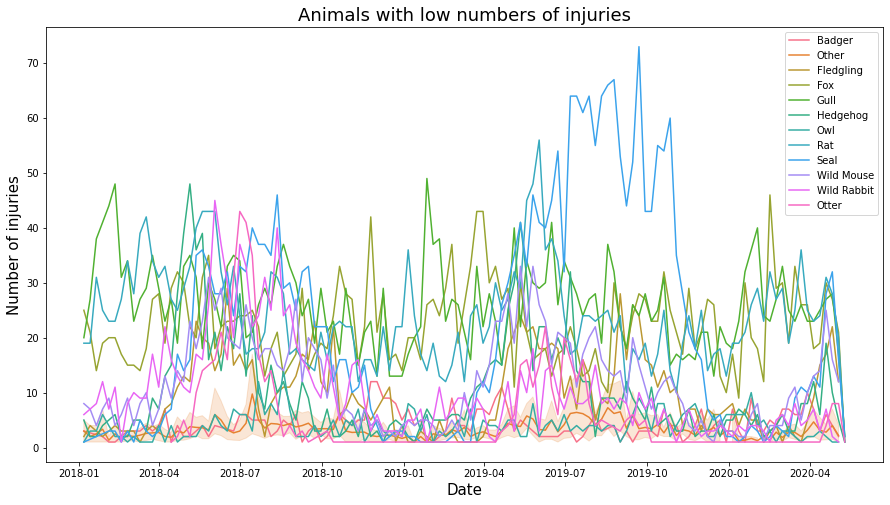

In [45]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="reason_for_call", hue='animal_type',data=weekly_low)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Animals with low numbers of injuries", size=18);

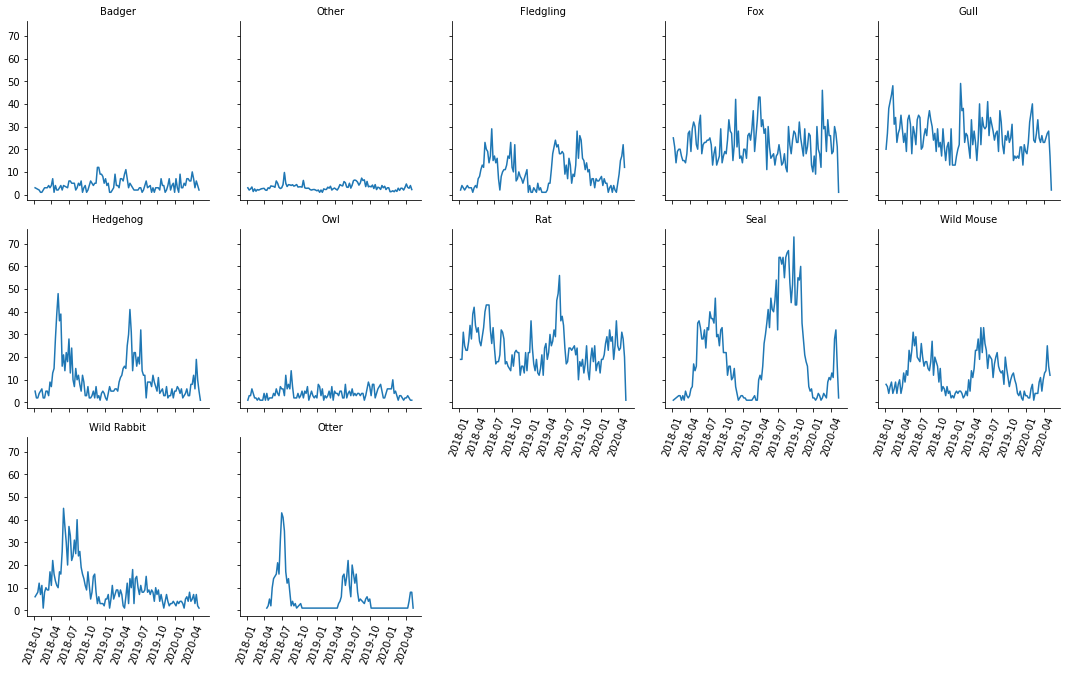

In [46]:
w_type=sns.FacetGrid(weekly_low, col='animal_type', col_wrap=5)
w_type.map_dataframe(sns.lineplot, x='CALL_SAVED_TIME', y='reason_for_call',ci = False)
w_type.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=70) for ax in w_type.axes.flat];

Some animals such as fox or gull have no relation to season.

# Analysis of advice calls

In [47]:
calls_df = wildlife.groupby(['type_of_calls','CALL_SAVED_TIME']).count().reset_index()
calls_df

,type_of_calls,CALL_SAVED_TIME,X1,CALL_REGION,reason_for_call,CA_ANIMAL_TYPE
0,advice_calls,2018-01-01,2,2,2,2
1,advice_calls,2018-01-02,4,4,4,4
2,advice_calls,2018-01-03,3,3,3,3
3,advice_calls,2018-01-04,6,6,6,6
4,advice_calls,2018-01-05,1,1,1,1
...,...,...,...,...,...,...
1626,report_calls,2020-05-01,89,89,89,89
1627,report_calls,2020-05-02,59,59,59,59
1628,report_calls,2020-05-03,50,50,50,50
1629,report_calls,2020-05-04,37,37,37,37


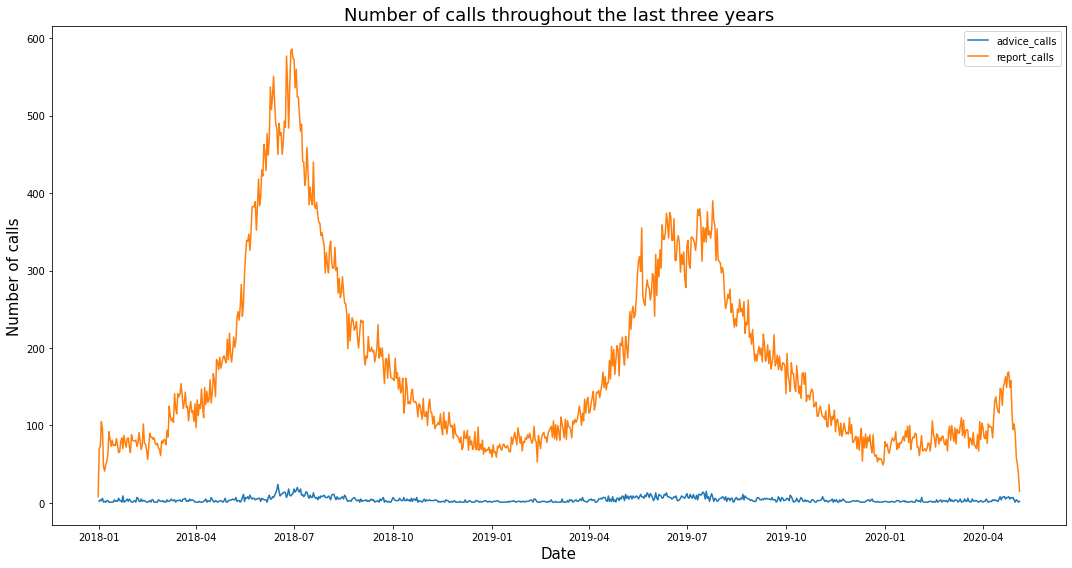

In [48]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call",hue = 'type_of_calls', data = calls_df)
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of calls throughout the last three years", size=18)
plt.legend(loc='best')
plt.tight_layout()
#as expected there are more report calls than advice

In [49]:
advice_df = calls_df[calls_df['type_of_calls']=='advice_calls']

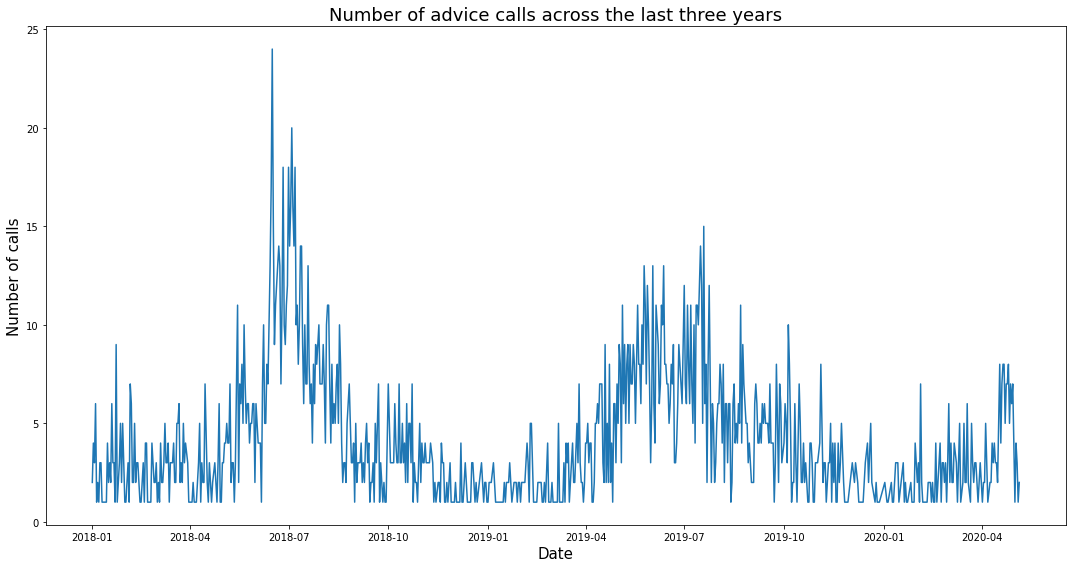

In [50]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = advice_df)
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of advice calls across the last three years", size=18)
plt.tight_layout()
#so many lines, requires to be changed to weekly calls

In [51]:
weekly_calls = wildlife.groupby([pd.Grouper(key = 'CALL_SAVED_TIME',freq = 'W'),'type_of_calls']).count()
weekly_calls

X1  CALL_REGION  reason_for_call  \
CALL_SAVED_TIME type_of_calls                                       
2017-12-31      report_calls      8            8                8   
2018-01-07      advice_calls     19           19               19   
                report_calls    481          481              481   
2018-01-14      advice_calls      9            9                9   
                report_calls    518          518              518   
...                             ...          ...              ...   
2020-04-26      report_calls   1103         1103             1103   
2020-05-03      advice_calls     32           32               32   
                report_calls    668          668              668   
2020-05-10      advice_calls      3            3                3   
                report_calls     52           52               52   

                               CA_ANIMAL_TYPE  
CALL_SAVED_TIME type_of_calls                  
2017-12-31      report_calls                8  
2018-01-07      advice_calls               19  
                report_calls              481  
2018-01-14      advice_calls                9  
                report_calls              518  
...                                       ...  
2020-04-26      report_calls             1103  
2020-05-03      advice_calls               32  
                report_calls              668  
2020-05-10      advice_calls                3  
                report_calls               52  

[247 rows x 4 columns]

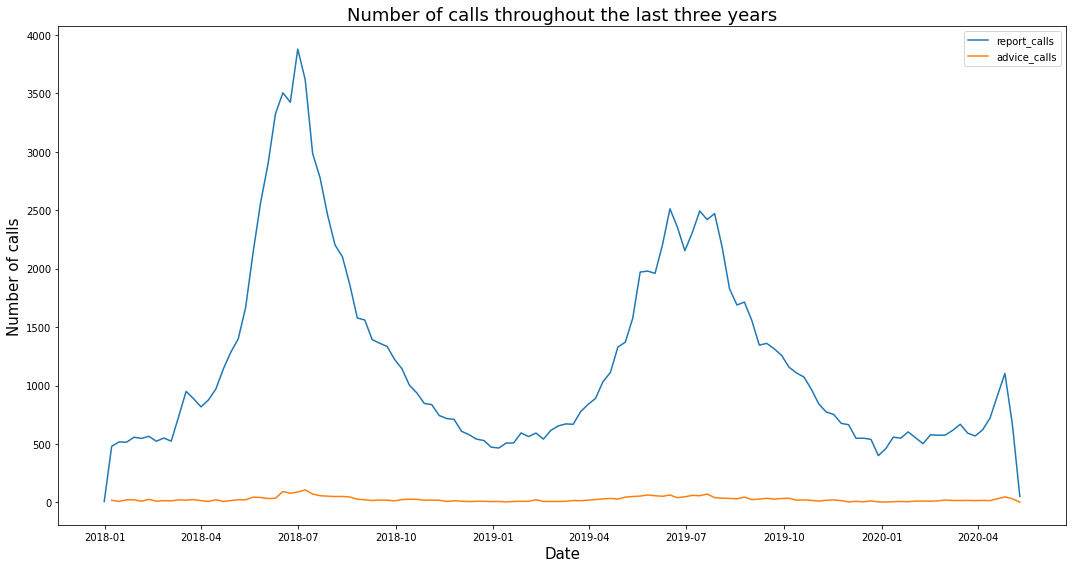

In [52]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", hue = 'type_of_calls', data = weekly_calls)
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of calls throughout the last three years", size=18)
plt.legend(loc='best')
plt.tight_layout()
#the same as daily plot but more smoother

In [53]:
advice_weekly_df = weekly_calls.reset_index()
advice_weekly_df = advice_weekly_df[advice_weekly_df['type_of_calls']=='advice_calls']

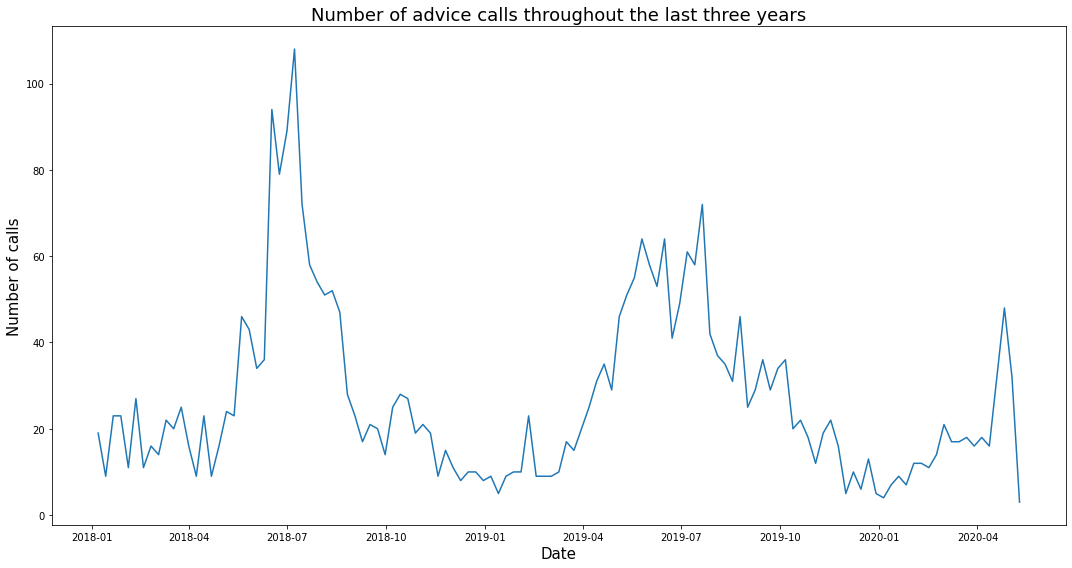

In [54]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = advice_weekly_df)
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of advice calls throughout the last three years", size=18)
plt.tight_layout()

#similar trend - increase at around spring/summer time